In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random 

import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import anndata as ann

sc.settings.set_figure_params(dpi=100)

In [3]:
DATA_DIR = ""
FILE_SCRNA = ""
FILE_PROT = ""

In [4]:
data_scrna

,all_bones_all_conditions,all_bones_Naive,all_bones_Sham,all_bones_MCAo,Brain_Naive,Femur_Naive,Humerus_Naive,Meninges_Naive,Pelvis_Naive,Scapula_Naive,...,Calvaria_Sham,Vertebra_Sham,Brain_MCAo,Femur_MCAo,Humerus_MCAo,Meninges_MCAo,Pelvis_MCAo,Scapula_MCAo,Calvaria_MCAo,Vertebra_MCAo
index,,,,,,,,,,,,,,,,,,,,,
Xkr4,0.000000,0.000000,0.000000,0.000000,0.007861,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.006764,0.000000,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000
Rp1,0.000045,0.000057,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000,0.000110,0.000196,...,0.000000,0.000000,0.000000,0.000034,0.000046,0.000114,0.000063,0.000121,0.000043,0.000054
Sox17,0.000020,0.000053,0.000000,0.000011,0.032389,0.000000,0.000000,0.001189,0.000000,0.000000,...,0.000000,0.000000,0.009382,0.000000,0.000000,0.001927,0.000066,0.000000,0.000000,0.000000
Mrpl15,0.084816,0.078530,0.097048,0.083388,0.087849,0.094567,0.100141,0.095947,0.075928,0.058668,...,0.059664,0.118299,0.116873,0.091969,0.104737,0.129882,0.084894,0.076394,0.064099,0.071940
Lypla1,0.090201,0.063954,0.100403,0.099480,0.055945,0.062629,0.067964,0.045913,0.067965,0.055836,...,0.076305,0.115752,0.045835,0.098189,0.111324,0.068985,0.105488,0.095792,0.082985,0.099734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.2,0.000083,0.000047,0.000058,0.000111,0.000000,0.000000,0.000080,0.000000,0.000000,0.000096,...,0.000244,0.000000,0.000000,0.000080,0.000136,0.000241,0.000064,0.000197,0.000112,0.000109
AC168977.1,0.000682,0.000699,0.000586,0.000708,0.001747,0.001020,0.001104,0.000842,0.000462,0.000364,...,0.000566,0.000923,0.000240,0.000550,0.000961,0.001069,0.001130,0.000384,0.000611,0.000554
AC149090.1,0.235047,0.221815,0.222165,0.246446,0.362131,0.206669,0.212423,0.141777,0.222716,0.231830,...,0.230897,0.269108,0.275155,0.228541,0.261478,0.207631,0.246666,0.276437,0.241779,0.237726


In [9]:
data_scrna = pd.read_csv(f"{DATA_DIR}/{FILE_SCRNA}" , index_col=0)

adata_prot = sc.read(f"{DATA_DIR}/{FILE_PROT}")

In [10]:
genes_prot = adata_prot.var_names.tolist()
genes_scrna = data_scrna.index.tolist()
common_genes = list(set(genes_scrna) & set(genes_prot))

In [13]:
print(f"There are {len(common_genes)} common genes between scrna and proteomics.")

There are 3539 common genes between scrna and proteomics.


In [16]:
adata_prot = adata_prot[:, common_genes]

all_bones_all_condition = adata_prot.X.mean(axis=1)

In [17]:
adata_prot_naive = adata_prot[adata_prot.obs["condition"] == "naive"]
adata_prot_mcao = adata_prot[adata_prot.obs["condition"] == "mcao"]
adata_prot_sham = adata_prot[adata_prot.obs["condition"] == "sham"]

In [ ]:
data_prot = pd.DataFrame(index=adata_prot.var_names)
data_prot["all_bones_all_conditions"] = adata_prot.X.mean(axis=0)
data_prot["all_bones_naive"] = adata_prot_naive.X.mean(axis=0)
data_prot["all_bones_sham"] = adata_prot_sham.X.mean(axis=0)
data_prot["all_bones_mcao"] = adata_prot_mcao.X.mean(axis=0)

In [22]:
for region in adata_prot.obs["region"].unique():
    adata_prot_region = adata_prot[adata_prot.obs["region"] == region]
    for c in adata_prot_region.obs["condition"].unique():
        adata_prot_rc = adata_prot_region[adata_prot_region.obs["condition"] == c]
        data_prot[f"{region}_{c}"] = adata_prot_rc.X.mean(axis=0)

In [26]:
data_scrna = data_scrna.loc[common_genes]

data_scrna.columns = [c.lower() for c in data_scrna.columns]

In [28]:
from scipy.stats import pearsonr, spearmanr

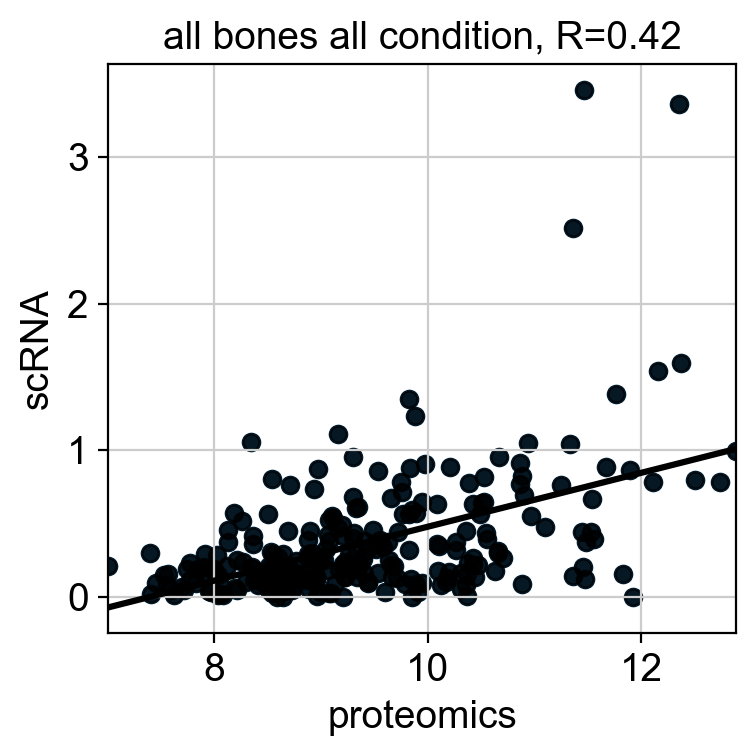

In [115]:
c="all_bones_all_conditions"

data = pd.DataFrame()
data["scRNA"] = data_scrna_nd[c]
data["proteomics"] = data_prot_nd[c]

plt.scatter(data_prot_nd[c], data_scrna_nd[c])
r = spearmanr(data_prot_nd[c], data_scrna_nd[c].fillna(0))[0]

sns.regplot(
                x="proteomics",
                y="scRNA",
                data=data,
                ci=None,
                color="black"
    )
plt.title(f"all bones all condition, R={r.round(2)}")
plt.tight_layout()
plt.show()